In [88]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy.fftpack as sfft
import plotly.express as px
import seaborn

### Authors: Janike Katter, Felix Reichling

### a)

#### 1. Interpolierende

Koeffizienten [ 0.  0.  0.  0.  1.  0. -1.  0.  1.  0. -1.  0.  0.  0.  0.  0.]


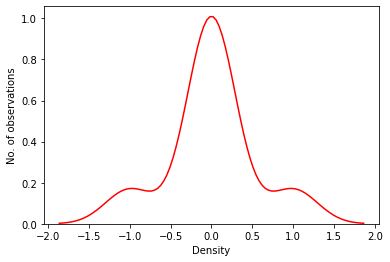

In [89]:
V1 = np.array([[0,0,0,0],
                [0,1,1,0],
                [0,1,1,0],
                [0,0,0,0]])

coefV1 = sfft.dct(V1, norm = 'ortho').reshape(16)
plt.xlabel('Density')
plt.ylabel('No. of observations')
seaborn.kdeplot(coefV1, color="r")
print('Koeffizienten', coefV1)

$P_4(s,t) = 2/4 \cdot \big(1/ \sqrt{2} \cdot \cos{\frac{\pi (2s+1)}{8}} + (-1) \cdot \cos{\frac{\pi (2s+1)}{8}} \cos{\frac{2\pi (2t+1)}{8}} + 1/ \sqrt{2} \cdot \cos{\frac{2\pi (2s+1)}{8}} + (-1) \cdot \cos{\frac{2\pi (2s+1)}{8}} \cos{\frac{2\pi (2t+1)}{8}}\big)$

In [103]:
x, y = np.arange(0, 4), np.arange(0, 4)
z = []
for s in x:
    z_i = []
    for t in y:
        
        res = 2/4 * (1/np.sqrt(2) * np.cos((np.pi*(2*s+1))/8) + (-1) * np.cos((np.pi*(2*s+1))/8) * np.cos((2* np.pi*(2*t+1))/8) + 1/np.sqrt(2) * np.cos((2*np.pi*(2*s+1))/8) + (-1) * np.cos((2 * np.pi*(2*s+1))/8) * np.cos((2* np.pi*(2*t+1))/8))
        z_i.append(res)
    z.append(z_i)    

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='1. Interpolierende', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()


#### 2. Interpolierende

Koeffizienten [6. 0. 0. 0. 2. 0. 4. 0. 6. 0. 0. 0. 2. 0. 4. 0.]


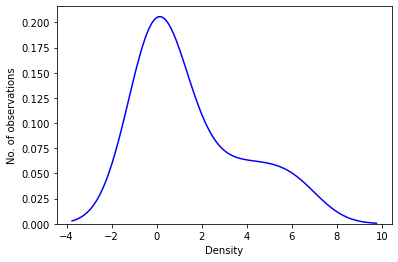

In [91]:
V2 = np.array([[3,3,3,3],
                [3,-1,-1,3],
                [3,3,3,3],
                [3,-1,-1,3]])

coefV2 = sfft.dct(V2, norm = 'ortho').reshape(16)
plt.xlabel('Density')
plt.ylabel('No. of observations')
seaborn.kdeplot(coefV2, color="b")
print('Koeffizienten', coefV2)


$P_4(s,t) = 2/4 \cdot \big(3 + \sqrt{2} \cdot \cos{\frac{\pi (2s+1)}{8}} + 4 \cdot \cos{\frac{\pi (2s+1)}{8}} \cdot \cos{\frac{2\pi (2t+1)}{8}}  + 3 \sqrt{2} \cdot \cos{\frac{2\pi (2s+1)}{8}} + \sqrt{2} \cdot \cos{\frac{3\pi (2s+1)}{8}} + 4 \cdot \cos{\frac{3\pi (2s+1)}{8}} \cdot \cos{\frac{2\pi (2t+1)}{8}}\big)$

In [102]:
x, y = np.arange(0, 4), np.arange(0, 4)
z = []
for s in x:
    z_i = []
    for t in y:
        
        res = 2/4 * (3 + np.sqrt(2) * np.cos((np.pi*(2*s+1))/8) + 4 * np.cos((np.pi*(2*s+1))/8) * np.cos((2* np.pi*(2*t+1))/8) + 3*np.sqrt(2) * np.cos((2*np.pi*(2*s+1))/8) + np.sqrt(2) * np.cos((3 * np.pi*(2*s+1))/8) + 4 * np.cos((3* np.pi*(2*s+1))/8)* np.cos((2* np.pi*(2*t+1))/8))
        z_i.append(res)
    z.append(z_i)    

fig2 = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig2.update_layout(title='2. Interpolierende', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig2.show()


### b)

In [92]:
# Quantisierungsmatrix aus dem Lesetext
Q1 = np.array([[8,16,24,32,40,48,56,64],
        [16,24,32,40,48,56,64,72],
        [24,32,40,48,56,64,72,80],
        [32,40,48,56,64,72,80,88],
        [40,48,56,64,72,80,88,96],
        [48,56,64,72,80,88,96,104],
        [56,64,72,80,88,96,104,112],
        [64,72,80,88,96,104,112,120]])
    
# Q aus Aufgabe 2
Q2 = np.array([[16,11,10,16,24,40,51,61],
        [12,12,14,19,26,58,60,55],
        [14,13,16,24,40,57,69,56],
        [14,17,22,29,51,87,80,62],
        [18,22,37,56,68,109,103,77],
        [24,35,55,64,81,104,113,92],
        [49,64,78,87,103,121,120,101],
        [72,92,95,98,112,100,103,99]])

In [93]:
'''
calculates quantisation with given p value
'''
def encode_quant(orig, quant):
    return (orig / quant).astype(np.int)

'''
calculates dequantisation with given p value
'''
def decode_quant(orig, quant):
    return (orig * quant).astype(float)

'''
calulates the 2D dct with the given blocksize
'''
def encode_dct(orig, bx, by):
    new_shape = (
        orig.shape[0] // bx * bx,
        orig.shape[1] // by * by
    )
    new = orig[
        :new_shape[0],
        :new_shape[1]
    ].reshape((
        new_shape[0] // bx,
        bx,
        new_shape[1] // by,
        by
    ))
    return sfft.dctn(new, axes=[1,3], norm='ortho')

'''
calulates the 2D idct with the given blocksize
'''
def decode_dct(orig, bx, by):
    return sfft.idctn(orig, axes=[1,3], norm='ortho'
    ).reshape((
        orig.shape[0]*bx,
        orig.shape[2]*by
    ))

In [94]:
'''
does the dct only for 8x8 greyscales
holdes almost the same code as functions above
(shows the first try and testing)
'''
def quant1(V8,p,Q):
    
    new_shape = (
        V8.shape[0] // 8 * 8,
        V8.shape[1] // 8 * 8
    )
    new = V8[
        :new_shape[0],
        :new_shape[1]
    ].reshape((
        new_shape[0] // 8,
        8,
        new_shape[1] // 8,
        8
    ))
    enc = sfft.dct(new, norm='ortho')
    ''' #Only for no quantisation
    quant = (
                (np.ones((8,8))
                 .clip(-100,100)
                 .reshape((1,8,1,8)))
                )
    '''
    quant = (
                ((Q * (p)))
                .clip(-100, 100)  # to prevent clipping
                .reshape((1,8,1,8))
            )
    
    encq = encode_quant(enc, quant)
    decq = decode_quant(encq, quant)
    r = sfft.idct(decq,norm = 'ortho')
    dec =r.reshape((
        decq.shape[0]*8,
        decq.shape[2]*8
    ))

    reconstructed = Image.fromarray(dec.astype(np.uint8),'L')
    plt.figure()
    plt.title(f'compressed p = {p}')
    plt.imshow(reconstructed, cmap = plt.get_cmap('Greys_r'))
    plt.show()

    

In [95]:
testpic = Image.open('TestBild2.jpg') # Auch mit TestBild.jpg möglich (siehe Png im Ordner)

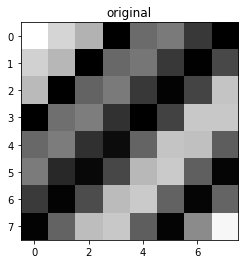

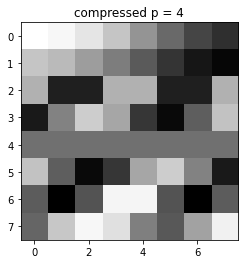

In [96]:
plt.figure()
plt.title('original')
plt.imshow(testpic, cmap = plt.get_cmap('Greys_r'))
picAr = np.array(testpic)
p = 4
quant1(picAr,p,Q1)

In [97]:
# Load image
lena = Image.open('lena.jpg')

In [98]:
'''
2D DCT for a given greyscale
x : array with the pictures pixel info
quants: array with the wanted p values
blocksize: tuple with the blocksize
Q: Quantisation matrix (use Q1 or Q2 from above)
'''
def quant2(x, quants, blocksize, Q):
    decs = []

    for qscale in quants:
        for bx,by in blocksize:
            quant = (
                    ((Q * (qscale)))
                    .clip(-100, 100)  # to prevent clipping
                    .reshape((1, bx, 1, by))
                )

        enc = encode_dct(x,bx,by)
        encq = encode_quant(enc, quant)
        decq = decode_quant(encq, quant)
        dec = decode_dct(decq, bx, by)

        decs.append((dec,qscale))
        
    for i in decs:
        reconstructed = Image.fromarray(i[0].astype(np.uint8),'L')
        p = i[1]
        plt.figure()
        plt.title(f'p = {p}')
        plt.imshow(reconstructed, cmap = plt.get_cmap('Greys_r'))
        plt.show()


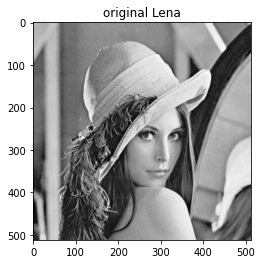

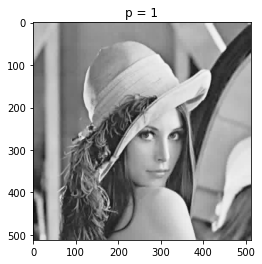

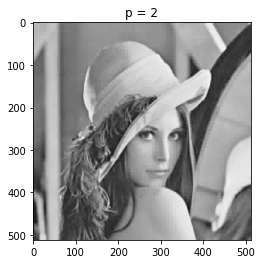

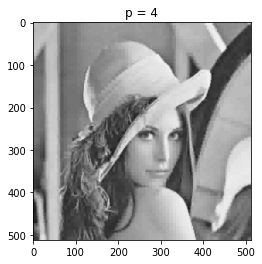

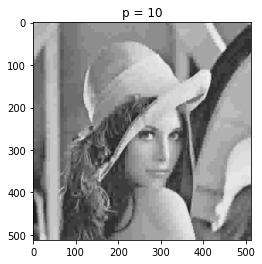

In [99]:
plt.figure()
plt.title('original Lena')
plt.imshow(lena, cmap = plt.get_cmap('Greys_r'))
x = np.array(lena)


quants = [1,2,4,10] # p values
blocksize = [(8,8)] # block size 8x8
quant2(x, quants, blocksize, Q1)